# **An Exploratory Data Analysis Pipeline to Illuminate Critical Business Insights**

**Name: Umamaheswari Nagalingam**

**Student ID : GH1029248**

## **About the dataset, client and the Business Questions**

This collaboration aims to harness the power of data science to address a series of pressing business questions that a company could face in its day-to-day operations and strategic planning.

**Client Company:** The client could be a prominent player in the retail market for smartphones and related accessories, having a vast network of retail outlets across multiple regions, catering to a diverse customer base, offering a wide range of products from budget smartphones to high-end devices and accessories.

**Data at Hand:** The dataset provided encompasses detailed sales transaction records, including date and time of purchase, product details, payment types, and transaction amounts. Additionally, the dataset offers insights into customer demographics, such as age, gender, and geographical location, although such data might require careful handling to ensure privacy and compliance with data protection regulations.


Dataset URL: https://www.kaggle.com/datasets/shubham2703/smartphone-retail-outlet-sales-data

**BUSINESS QUESTIONS:**


*   What are the peak sales months?
*   How do sales vary by payment type?
*   Which product type has the highest sales?
*   What is the average transaction amount?
*   How does the quantity sold vary with the type of product?
*   What are the sales trends for different types of products over the years?
*   Which type of accessory/mobile is most popular?

## **Loading the Dataset**
Starting off, we're getting our data into shape by bringing it into a pandas DataFrame. This step is like opening the door to our data analysis house, making sure everything's in place for a comfortable exploration. By peeking at the first few rows, we ensure there are no surprises and that we're ready to dive deeper.

In [48]:
import pandas as pd

# Loading the dataset
file_path = '/content/drive/MyDrive/SMARTPHONE RETAIL OUTLET SALE DATA.csv'
data = pd.read_csv(file_path)

# To display the first few rows of the dataset
print(data.head())


         Date        F.Y  QUARTER     P_NO PAYMENT TYPE TYPE OF PRODUCT  \
0  01-04-2018  2018-2019        1   P/A/36         CASH       ACCESSORY   
1  01-04-2018  2018-2019        1   P/A/47         CASH       ACCESSORY   
2  01-04-2018  2018-2019        1  P/M/A34       CREDIT          MOBILE   
3  01-04-2018  2018-2019        1  P/M/A42       CREDIT          MOBILE   
4  01-04-2018  2018-2019        1  P/M/A42        DEBIT          MOBILE   

   Quantity    Price    Amount TYPE OF ACCESSORY/MOBILE  
0         1  2042.38   2542.38                    COVER  
1         1  2042.38   2118.64         WIRELESS HEADSET  
2         1  2042.38  13303.58             BUDGET PHONE  
3         1  2042.38  51696.43           FLAGSHIP PHONE  
4         1  2042.38  51696.42           FLAGSHIP PHONE  


## **Preliminary Data Exploration**
It's like taking a flashlight and looking around the dataset. We're checking out the layout (with data.info()), seeing what the numbers tell us (via data.describe()), and spotting if anything's missing (data.isnull().sum()). This step sets us up for a smoother journey by giving us a good lay of the land.

In [49]:
# To view the general overview of the dataset
print(data.info())

# To get to the summary statistics for numerical columns
print(data.describe())

# To check for any missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6421 non-null   object 
 1   F.Y                       6421 non-null   object 
 2   QUARTER                   6421 non-null   int64  
 3   P_NO                      6420 non-null   object 
 4   PAYMENT TYPE              6421 non-null   object 
 5   TYPE OF PRODUCT           6421 non-null   object 
 6   Quantity                  6421 non-null   int64  
 7   Price                     6421 non-null   float64
 8   Amount                    6421 non-null   float64
 9   TYPE OF ACCESSORY/MOBILE  6421 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 501.8+ KB
None
           QUARTER     Quantity          Price         Amount
count  6421.000000  6421.000000    6421.000000    6421.000000
mean      2.249338     1.058246   18295.

## **Data Cleaning and Preprocessing**
Here, we're tidying up. Prepping our workspace before the real work begins. Removing rows with missing values in critical columns ensures that the analysis is based on complete records. Converting the 'Date' column to datetime format allows for time series analysis, which is more accurate and convenient for handling dates in Pandas.

In [50]:
# To remove rows where 'P_NO' is missing
data.dropna(subset=['P_NO'], inplace=True)


In [51]:
# Converting 'Date' to datetime for time series analysis
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)



## **Exploratory Data Analysis (EDA) with Business Questions**
The core journey: This is where we start answering the big questions. Each question guides us through different paths in the dataset, using charts and numbers as our map and compass. Whether we’re uncovering sales trends, diving into payment preferences, or figuring out which products are the stars, it’s all about connecting the dots in a way that’s as insightful as it is visual.

For instance: Finding out which months light up the sales charts helps in planning. Analyzing payment types gives us a peek into customer preferences. And seeing which products are flying off the shelves? That’s gold for inventory and marketing moves. Our visual aids here aren’t just pretty pictures; they’re windows into our data’s soul.

### **Business Question 1: What are the peak sales months?**

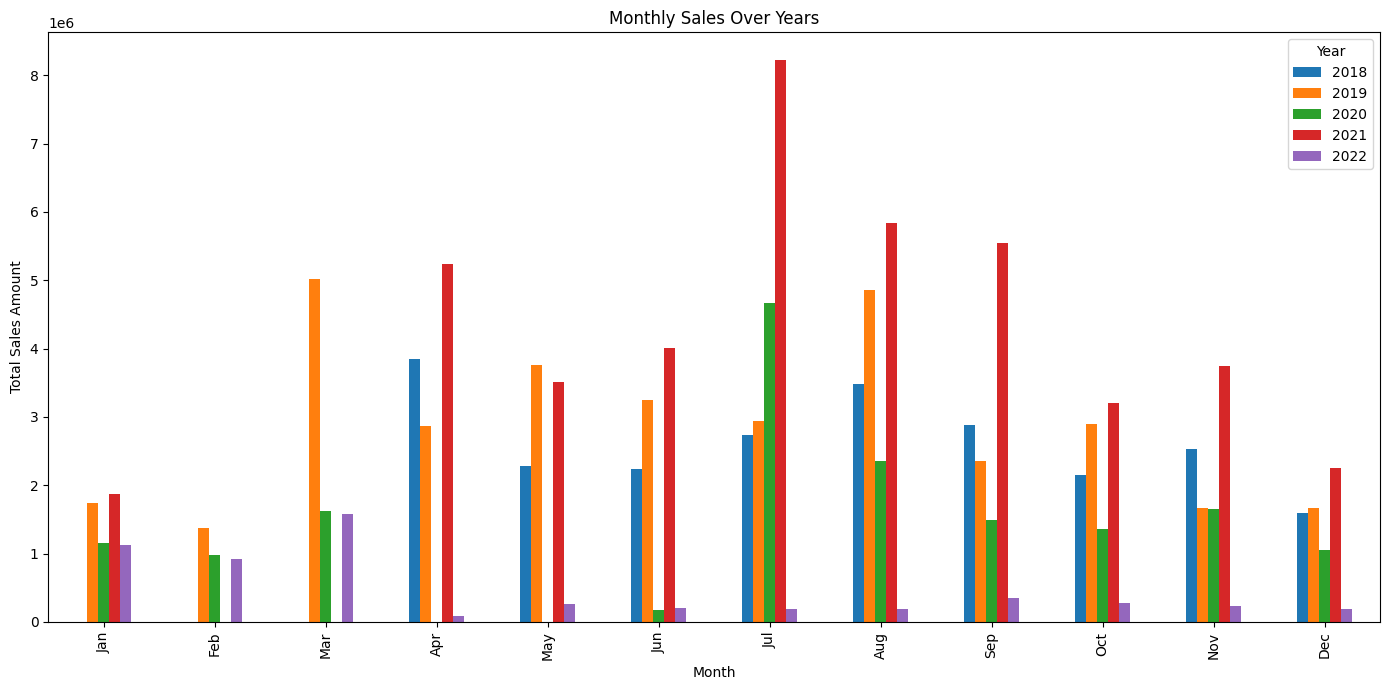

In [52]:
import matplotlib.pyplot as plt

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Grouping by 'Year' and 'Month', then summing 'Amount'
monthly_sales = data.groupby(['Year', 'Month'])['Amount'].sum().reset_index()

# Creating a pivot table for plotting
pivot_table = pd.pivot_table(monthly_sales, values='Amount', index='Month', columns='Year')

# Plotting the sales trends with the pivot table
pivot_table.plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.tight_layout()
plt.show()




### **Business Question 2: How do sales vary by payment type?**

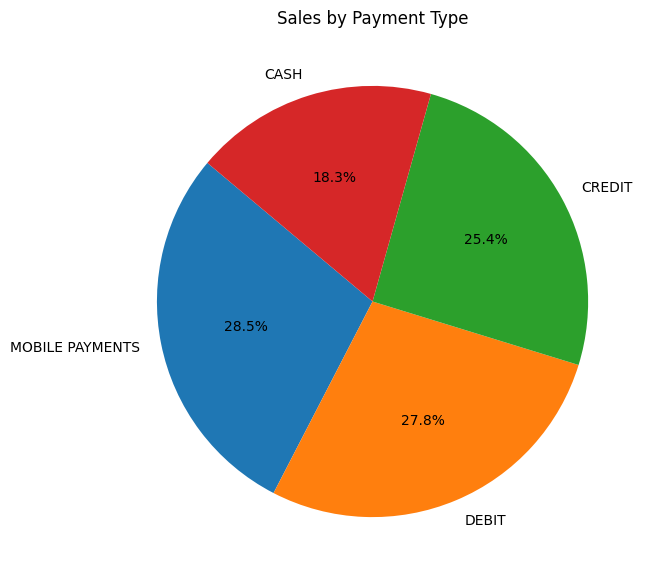

In [53]:
# Sales count by payment type
payment_types = data['PAYMENT TYPE'].value_counts()

# Plotting
payment_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(7, 7))
plt.title('Sales by Payment Type')
plt.ylabel('')
plt.show()


### **Business Question 3: Which product type has the highest sales?**

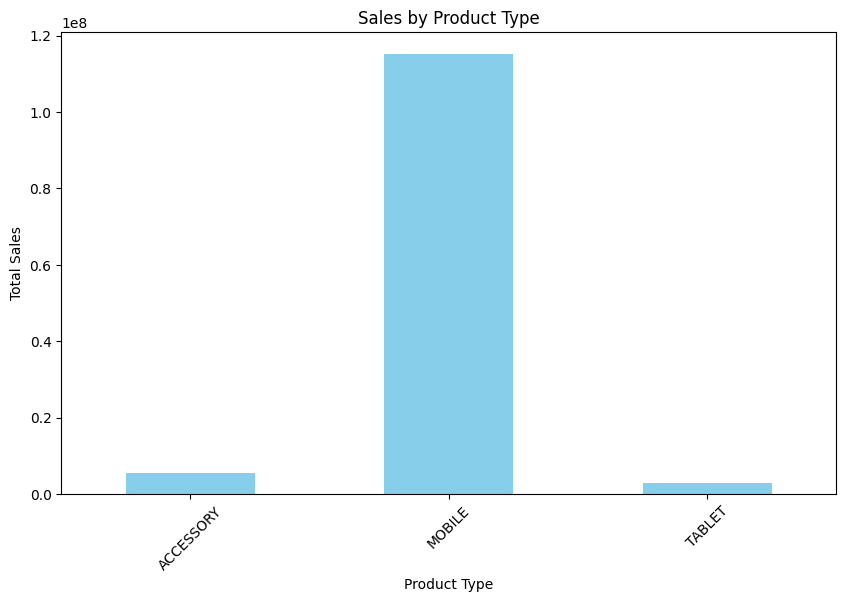

In [54]:
# Summarizing sales by product type
sales_by_product = data.groupby('TYPE OF PRODUCT')['Amount'].sum()

# Plotting
sales_by_product.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


### **Business Question 4: What is the average transaction amount?**

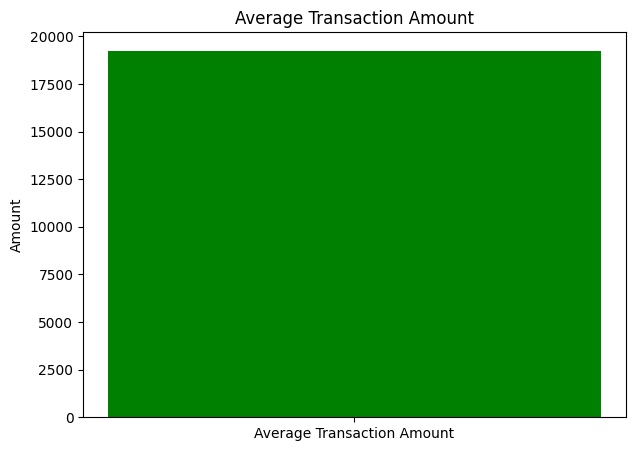

In [55]:
# Calculating the average transaction amount
average_transaction = data['Amount'].mean()

# Plotting
plt.figure(figsize=(7, 5))
plt.bar('Average Transaction Amount', average_transaction, color='green')
plt.title('Average Transaction Amount')
plt.ylabel('Amount')
plt.show()


### **Business Question 5: How does the quantity sold vary with the type of product?**

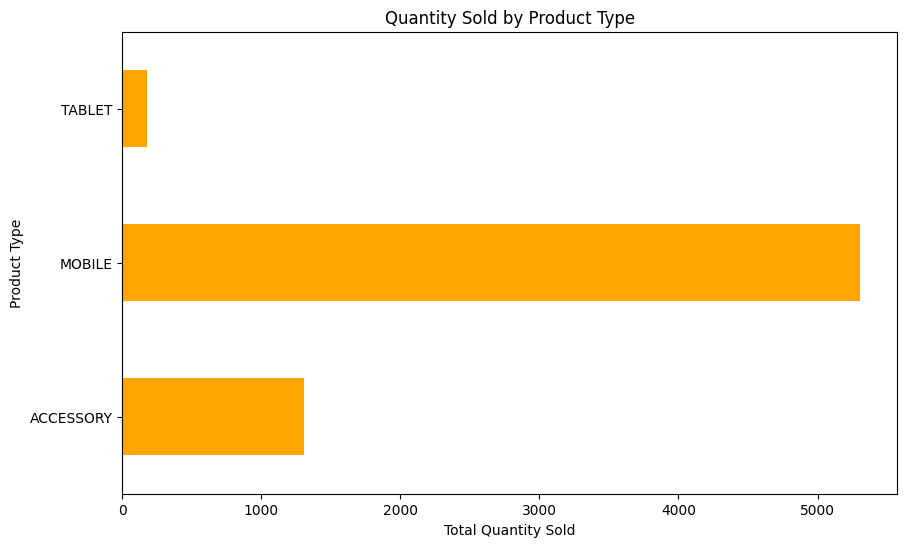

In [56]:
# Summarizing quantity sold by product type
quantity_by_product = data.groupby('TYPE OF PRODUCT')['Quantity'].sum()

# Plotting
quantity_by_product.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('Quantity Sold by Product Type')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Type')
plt.show()


### **Business Question 6: What are the sales trends for different types of products over the years?**

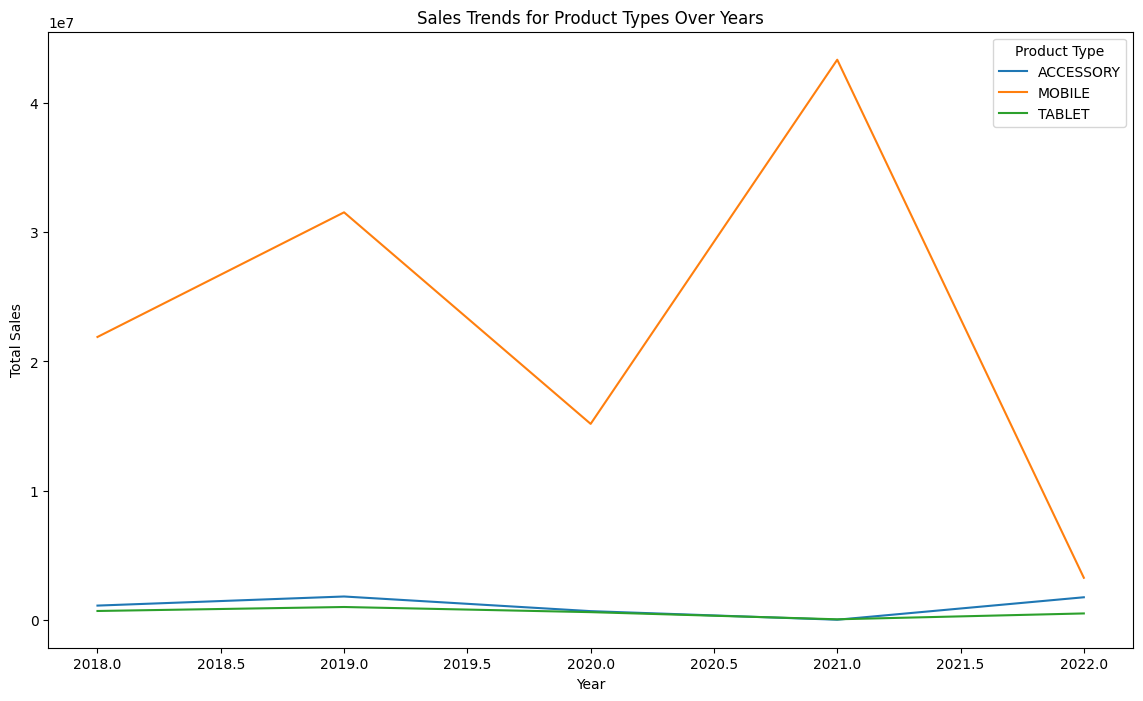

In [57]:
# Creating a pivot table for sales amount by product type and year
pivot_sales_product_year = pd.pivot_table(data, values='Amount', index=['Year'], columns='TYPE OF PRODUCT', aggfunc='sum')

# Plotting
pivot_sales_product_year.plot(kind='line', figsize=(14, 8))
plt.title('Sales Trends for Product Types Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Type')
plt.show()


### **Business Question 7: Which type of accessory/mobile is most popular?**

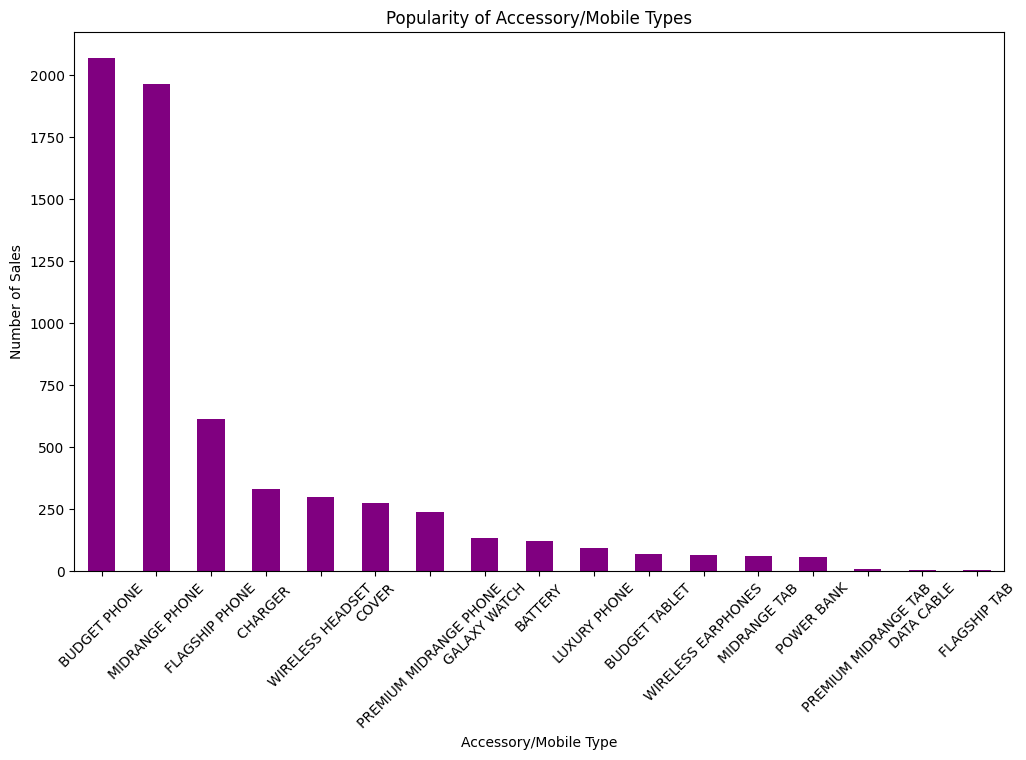

In [58]:
# Counting sales for each accessory/mobile type
accessory_mobile_counts = data['TYPE OF ACCESSORY/MOBILE'].value_counts()

# Plotting
accessory_mobile_counts.plot(kind='bar', figsize=(12, 7), color='purple')
plt.title('Popularity of Accessory/Mobile Types')
plt.xlabel('Accessory/Mobile Type')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


## **Conclusion and Recommendations:**
**Conclusions:**

**Sales Variation by Payment Type:** The distribution of sales across different payment types indicates customer preferences, possibly highlighting the dominance of certain payment methods. For example, if cash payments are most prevalent, it suggests a customer base that might value traditional transaction methods.

**Product Type Sales:** Identifying which product types have the highest sales gives insight into consumer demand and market trends. Products leading in sales should be prioritized in terms of inventory and promotional efforts.

**Average Transaction Amount:** Understanding the average transaction amount helps in assessing the pricing strategy and customer spending behavior, indicating whether customers lean towards higher-priced items or more budget-friendly options.

**Quantity Sold by Product Type:** The variation in quantity sold across product types, apart from just revenue, highlights which products are volume drivers. This could suggest focusing on these items for volume-based promotions or bundling strategies.

**Sales Trends Over Years:** The analysis of sales trends over time for different product types can reveal emerging or declining markets, informing long-term strategic planning and inventory decisions.

**Popularity of Accessory/Mobile Types:** Knowing which accessories or mobile types are most popular can guide inventory decisions, marketing campaigns, and potentially new product development.

**Recommendations:**

**Optimize Payment Processing:** Given the preference for specific payment types, consider streamlining those processes, offering promotions for less-used payment methods, or exploring new payment technologies to enhance customer convenience.

**Inventory Management:** Prioritize stocking high-demand product types and consider adjusting procurement strategies based on the popularity and sales volume of different products and accessories.

**Pricing Strategy:** Leverage insights from the average transaction amount to tailor pricing strategies, potentially offering financing options or promotions to encourage purchases closer to the average or higher.

**Promotional Efforts:** Use the data on quantity sold and product popularity to design targeted promotions, loyalty programs, or discounts that encourage volume purchases or boost sales of less popular items.

**Strategic Planning:** Analyze sales trends over time to forecast demand, prepare for seasonal fluctuations, and make informed decisions about introducing new product lines or phasing out underperforming categories.

**Marketing Campaigns:** Focus marketing efforts on the most popular types of accessories or mobiles, utilizing social media, email marketing, and in-store displays to highlight these items and capitalize on their popularity.